Timestamp: 6/27/2024 4:04 PM

# *Web Scraping OPM Song Lyrics*

 **Important**

The activity uses a [website](https://www.azlyrics.com/) for the list of OPM songs and singers, which may not contain all OPM songs or artists. 

In [73]:
from bs4 import BeautifulSoup
from collections import Counter
import bs4
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import random as rd
import requests
import re
import seaborn as sns
import time

In [74]:
print("BeautifulSoup4:", bs4.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Pandas:", pd.__version__)
print("Requests:", requests.__version__)
print("RegEx:", re.__version__)
print("Seaborn:", sns.__version__)

BeautifulSoup4: 4.12.3
Matplotlib: 3.9.0
Pandas: 2.2.2
Requests: 2.32.3
RegEx: 2.2.1
Seaborn: 0.13.2


# Preliminaries

## **Dataset Description**

The song and singer data was extracted from [this](https://www.azlyrics.com/) website, which contains lyrics for each song of a specified artist.

To isolate the data to include only OPM songs, a list of Filipino singers was taken from [this](https://en.wikipedia.org/wiki/List_of_Filipino_singers) website.

In [75]:
singers = ["Dong Abay", "Bayani Agbayani", "Joey Albert", "Barbie Almalbis", "Amapola", "Cynthia Alexander", "Freddie Aguilar", "Hajji Alejandro", "Rachel Alejandro", "Joey Ayala", "Kyline Alcantara", "Ogie Alcasid", "Dely Atay-Atayan", "Dingdong Avanzado", "Carol Banawa", "Edward Barber", "Bayang Barrios", "Carlos Balcells", "Bassilyo", "Heber Bartolome", "Jimmy Bondoc", "Jovit Baldivino", "Christian Bautista", "Beabadoobee", "Zild Benitez", "Mark Bautista", "Janine Berdin", "Blakdyak", "Rico Blanco", "Alisah Bonaobra", "Andrea Brillantes", "Ely Buendia", "Noel Cabangon", "Lito Camo", "Ryan Cayabyab", "Billy Crawford", "John Cadeliña", "Jose Mari Chan", "Kim Chiu", "Kean Cipriano", "Sam Concepcion", "Pilita Corrales", "Teddy Corpuz", "Roel Cortez", "Yeng Constantino", "Donna Cruz", "Radha Cuadrado", "Sharon Cuneta", "Anne Curtis", "Claire de la Fuente", "Glaiza de Castro", "Dianne dela Fuente", "Dingdong Dantes", "Karina Constantino David", "JM de Guzman", "Klarisse de Guzman", "Mrld", "Moira Dela Torre", "Joey de Leon", "Kisses Delavin", "Enchong Dee", "Lourd de Veyra", "Francine Diaz", "Elaine Duran", "Jason Dy", "Andrew E.", "Kyle Echarri", "Maymay Entrata", "Bituin Escalante", "Darren Espanto", "Brenan Espartinez", "Karla Estrada", "Heart Evangelista", "Seth Fedelin", "Pops Fernandez", "Juris Fernandez", "Florante", "Rose Fostanes", "Vice Ganda", "Maricris Garcia", "Tootsie Guevara", "Janno Gibbs", "Enrique Gil", "Nikki Gil", "Rachelle Ann Go", "Sarah Geronimo", "King Girado", "Alex Gonzaga", "Toni Gonzaga", "Gary Granada", "Catriona Gray", "Mike Hanopol", "Solenn Heussaff", "Agot Isidro", "Ramon Jacinto", "Jaya", "RJ Jimenez", "Jing Hidalgo Santos", "Karylle", "Angela Ken", "Kyla", "Yasmien Kurdi", "Juan Karlos Labajo", "Raymond Lauchengco", "Kris Lawrence", "Kuh Ledesma", "Celeste Legaspi", "Ronnie Liang", "Xian Lim", "Nadine Lustre", "Chito Miranda", "Jed Madela", "Elmo Magalona", "Francis Magalona", "Bamboo Manalac", "Jennylyn Mercado", "Gian Magdangal", "Jolina Magdangal", "Michael Pangilinan", "Maine Mendoza", "Sam Milby", "Lani Misalucha", "Vina Morales", "Morissette", "Kitchie Nadal", "Roselle Nava", "Sitti Navarro", "Vhong Navarro", "Arthur Nery", "Martin Nievera", "Nina", "Grace Nono", "Paolo Onesa", "Daryl Ong", "Daniel Padilla", "Kylie Padilla", "Zsa Zsa Padilla", "Manny Pacquiao", "Inigo Pascual", "Piolo Pascual", "Jett Pangan", "Imelda Papin", "Eddie Peregrina", "Arnel Pineda", "Lovi Poe", "Pokwang", "Marcelito Pomoy", "Richard Poon", "Chickoy Pura", "Yassi Pressman", "Rico J. Puno", "Myk Perez", "Odette Quesada", "Angeline Quinto", "Zia Quizon", "Jay R", "Khalil Ramos", "John Raymundo", "April Boy Regino", "Sheryn Regis", "James Reid", "Willie Revillame", "Manilyn Reynes", "Alden Richards", "Ariel Rivera", "Jamie Rivera", "Marian Rivera", "Olivia Rodrigo", "Wilbert Ross", "Karl Roy", "Myra Ruaro", "Sarah Geronimo", "Lea Salonga", "Unique", "Janella Salvador", "Maja Salvador", "Sampaguita", "Julie Anne San Jose", "Josh Santana", "Randy Santiago", "Aicelle Santos", "Erik Santos", "Gerald Santos", "Judy Ann Santos", "Vehnee Saturno", "Aiza Seguerra", "Vic Sotto", "Marco Sison", "Jay-R Siaboc", "Pepe Smith", "Max Surban", "KZ Tandingan", "Daniel Tagibao", "Ivy Violan", "Michael V", "Regine Velasquez", "Nikki Valdez", "Gary Valenciano", "Rey Valera", "Viktoria", "Jessica Villarubin", "Yoyoy Villame", "Cris Villonco", "Jona Viray", "Katrina Velarde", "Victor Wood", "Richard Yap", "Mitoy Yonting", "Jake Zyrus", "Jessa Zaragoza"]

singer_urls = []

# Transforms the singer's names into codes that can be found in the website
for singer in singers:
    singer_urls.append(singer.lower().replace(" ", "")) 

print(singer_urls)

['dongabay', 'bayaniagbayani', 'joeyalbert', 'barbiealmalbis', 'amapola', 'cynthiaalexander', 'freddieaguilar', 'hajjialejandro', 'rachelalejandro', 'joeyayala', 'kylinealcantara', 'ogiealcasid', 'delyatay-atayan', 'dingdongavanzado', 'carolbanawa', 'edwardbarber', 'bayangbarrios', 'carlosbalcells', 'bassilyo', 'heberbartolome', 'jimmybondoc', 'jovitbaldivino', 'christianbautista', 'beabadoobee', 'zildbenitez', 'markbautista', 'janineberdin', 'blakdyak', 'ricoblanco', 'alisahbonaobra', 'andreabrillantes', 'elybuendia', 'noelcabangon', 'litocamo', 'ryancayabyab', 'billycrawford', 'johncadeliña', 'josemarichan', 'kimchiu', 'keancipriano', 'samconcepcion', 'pilitacorrales', 'teddycorpuz', 'roelcortez', 'yengconstantino', 'donnacruz', 'radhacuadrado', 'sharoncuneta', 'annecurtis', 'clairedelafuente', 'glaizadecastro', 'diannedelafuente', 'dingdongdantes', 'karinaconstantinodavid', 'jmdeguzman', 'klarissedeguzman', 'mrld', 'moiradelatorre', 'joeydeleon', 'kissesdelavin', 'enchongdee', 'lour

## **Variables**

Here are the list of variables that would be used

In [76]:
singers_that_have_webpages = []
singers_that_have_webpages_from_file = []
webpages_that_exist = []
all_song_links = []
all_song_titles = []
all_song_lyrics = []
all_words = []

# Data Extraction

## **Webpage Checking**

First, we check if a webpage exists for each singer.

If a page does not exist for a singer, we discard the singer.

In [77]:
for singer_url_number in range(len(singers)):

    # Gets the webpage with the singer codes
    response = requests.get('https://www.azlyrics.com/' + singer_urls[singer_url_number][0] + '/' + singer_urls[singer_url_number] + '.html')
    
    # Removes singers that do not have webpages
    if response.status_code == 200:
        webpages_that_exist.append(response)
        singers_that_have_webpages.append(singers[singer_url_number])
        
    time.sleep(rd.randint(5, 10))

print("Singers with webpages:", singers_that_have_webpages)


KeyboardInterrupt: 

## **Songs URL Extraction**

Each singer's webpage was opened and checked for "a" tags.

Tags that contained the *href* attribute with a value that had a prefix of "/lyrics/" were then isolated to get the url for the song lyrics.

In [ ]:
for webpage_count in range(len(webpages_that_exist)):
    
    # Finds all <a> tags in the singer webpages 
    all_a_tags = BeautifulSoup(webpages_that_exist[webpage_count].text, 'html.parser').find_all('a', target="_blank")

    # Filters the <a> tags to get only the ones with the "/lyrics/" prefix 
    filtered_a_tags = [a for a in all_a_tags if a['href'].startswith("/lyrics/")]

    # Gets the links for all the song lyrics in the singer webpage
    song_link = [a['href'] for a in filtered_a_tags]
    all_song_links.append(song_link)

print("Links for each song:", all_song_links)

Links for each song: [['/lyrics/dongabay/espasyo.html', '/lyrics/dongabay/akrostik.html', '/lyrics/dongabay/abaaba.html', '/lyrics/dongabay/perpekto.html', '/lyrics/dongabay/kukote.html', '/lyrics/dongabay/awitngkambing.html', '/lyrics/dongabay/tuyo.html', '/lyrics/dongabay/mateosingko.html', '/lyrics/dongabay/dyad.html', '/lyrics/dongabay/bombardment.html', '/lyrics/dongabay/aybuhay.html', '/lyrics/dongabay/segundo.html', '/lyrics/dongabay/solb.html', '/lyrics/dongabay/wwiii.html'], ['/lyrics/jakezyrus/hiling.html', '/lyrics/jakezyrus/bagyo.html', '/lyrics/jakezyrus/illbethere.html', '/lyrics/jakezyrus/dnm.html', '/lyrics/jakezyrus/diamond.html', '/lyrics/jakezyrus/loveevenif.html', '/lyrics/jakezyrus/tapestry.html', '/lyrics/jakezyrus/4life.html', '/lyrics/jakezyrus/4liferemix.html', '/lyrics/jakezyrus/fixme.html', '/lyrics/jakezyrus/missyouinthemoonlight.html']]


## **Storing the Data**

A .csv file was created for each songs data to be stored in.

In [ ]:
if not os.path.exists("all_opm_songs.csv"):
    with open("all_opm_songs.csv", 'w') as file:
        pass

Multiple .txt files were also created to track data.

In [ ]:
if not os.path.exists("singers_done.txt"):
    with open("singers_done.txt", 'w') as file:
        file.write("0")

## **Song Title and Lyrics Extraction**

**Each song's titles and lyrics were extracted in 5 steps**


1. The url for the webpage containing each song's lyrics was opened and converted into text form.

2. For the song's title, all "h1" tags were extracted from the webpage

3. A RegEx function was used to isolate the text inside quotation marks in the tag to get the title

4. For the song lyrics, all "div" tags were extracted from the webpage

5. All "div" tags without any attributes were then isolated, which contain the lyrics

After extracting the song data of each singer, the data was then added to the .csv file. 

In [ ]:
with open('singers_that_have_webpages.txt', 'r') as file:
    singers_that_have_webpages_from_file = eval(file.read())

for singer_number in range(len(singers_that_have_webpages)):
    
    all_songs_data_per_singer = []

    with open('singers_done.txt', 'r') as file:
        
        singer_number = int(file.read())

    if len(singers_that_have_webpages) == singer_number:
        break

    for song in all_song_links[singer_number]:
        
        song_title = ""
        song_lyrics = ""

        # Gets the song lyrics webpage
        response = requests.get('https://www.azlyrics.com' + song)
        
        # Gets all the <div> tags in the webpage
        all_div_tags = BeautifulSoup(response.text, 'html.parser').find_all('div')

        # Finds all the h1 tags containing song titles
        h1_tags = BeautifulSoup(response.text, 'html.parser').find_all('h1')

        for song_number in range(len(h1_tags)):
            
            # Isolates the song title and adds the song titles to a list 
            pattern = r'["\'](.*?)["\']'
            song_title = re.search(pattern, h1_tags[song_number].text).group(1)

        # Gets all <div> tags without classes or ids, which are the lyrics
        song_lyrics = [div for div in all_div_tags if not div.get("class") and not div.get("id")]

        # Makes a dictionary that contains all the information of the song
        songs_data = {"Song" : song_title, "Lyrics" : song_lyrics[0].text, "Singer" : singers_that_have_webpages[singer_number]}
        all_songs_data_per_singer.append(songs_data)
         
        time.sleep(rd.randint(5, 10)) 
    
    print(all_songs_data_per_singer, end = " / ")  

    csv_dataframe = pd.DataFrame(all_songs_data_per_singer)
    csv_dataframe.to_csv("all_opm_songs.csv", mode='a', index=False, header=True)

    with open("singers_done.txt", 'w') as file:

        file.write(str(singer_number + 1))


# *Exploratory Data Analysis*

A few questions were made which can be answered by Exploratory Data Analysis

1. Which singer has the most songs? Which had the fewest?

2. What word was the most frequently used out of all words in all song lyrics?

In [ ]:
dataset = pd.read_csv("all_opm_songs.csv")
dataset.head(11)

EmptyDataError: No columns to parse from file

## **EDA Question 1**

Question: Which singer has the most songs? Which had the fewest?

To find out which singer has the most songs in the datset, we first count how many songs each singer has.

In [ ]:
# Count the number of songs per singer
song_counts = dataset['Singer'].value_counts()
song_counts.head(10)

Singer
Dong Abay     14
Jake Zyrus    11
Name: count, dtype: int64

Afterwards, to easily compare the values, we use a bar chart to display them.

C:\Users\dell\AppData\Local\Temp\ipykernel_15776\2091048688.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = song_counts.index, y = song_counts.values, palette = 'icefire')


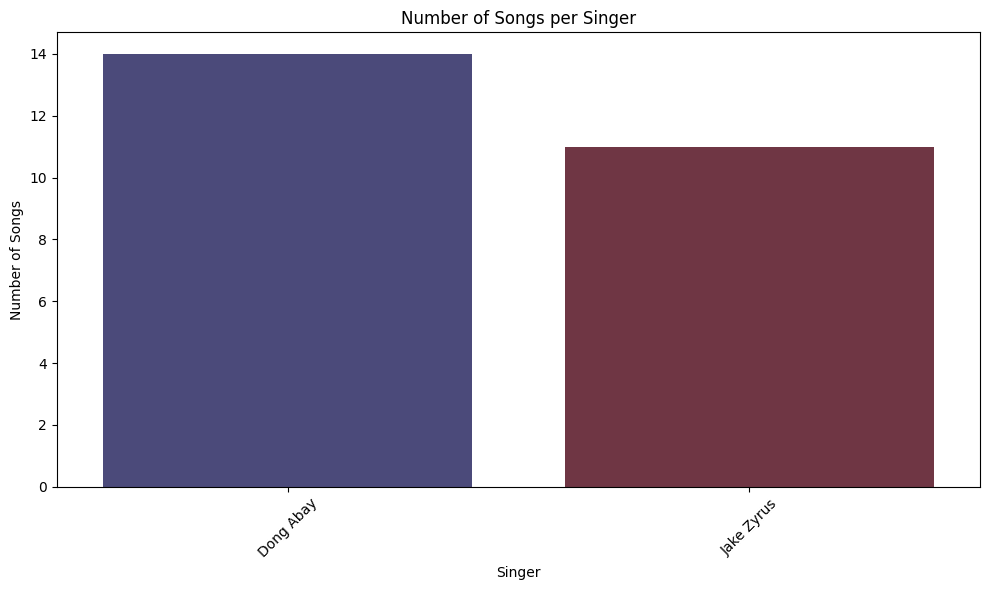

In [ ]:
# Plot a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x = song_counts.index, y = song_counts.values, palette = 'icefire')

plt.title('Number of Songs per Singer')
plt.xlabel('Singer')
plt.ylabel('Number of Songs')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

## **EDA Question 2**

Question: What word was the most frequently used out of all words in all song lyrics?

In order to compare the **frequency** of each word, we will split each song's lyrics into words.

In [ ]:
# Combine all lyrics into one string
all_lyrics = " ".join(dataset["Lyrics"])

# Remove punctuation and convert to lowercase
all_lyrics = re.sub(r'[\.,!?;:"]', "", all_lyrics).lower()

# Split the lyrics into words
all_words = all_lyrics.split()

print(all_words)

['kwento-kwenta', 'kwento-kwenta', 'kwento-kwenta', 'tila', 'kanta', 'kwento-kwenta', 'kwento-kwenta', 'kwento-kwenta', 'binibenta', 'sa', 'paglapag', 'ng', 'sombrero', 'makakapagsulat', 'ako', 'ng', 'alamat', 'bigyan', 'lang', 'ako', 'ng', 'espasyo', 'bigyan', 'lang', 'ako', 'ng', 'espasyo', 'aking', 'kwento', 'ay', 'buhay', 'ko', 'at', 'buhay', 'mo', 'aking', 'kwento', 'buhay', 'pilipino', 'buhay', 'pilipino', 'kwento-kwenta', 'kwento-kwenta', 'kwento-kwenta', 'tila', 'kanta', 'kwento-kwenta', 'kwento-kwenta', 'kwento-kwenta', 'binibenta', 'hindi', 'ka', 'pa', 'kuntento', 'hindi', 'ka', 'pa', 'kuntento', 'hindi', 'ka', 'pa', 'kuntento', 'sa', 'eksperimento', 'akala', "mo'y", 'may', 'kwenta', 'pero', 'wala', 'pala', 'hindi', 'ka', 'pa', 'kuntento', 'hindi', 'ka', 'na', 'nasanay', 'hindi', 'ka', 'na', 'nasanay', 'hindi', 'ka', 'na', 'nasanay', 'sa', 'pagbabagong', 'buhay', 'akala', 'mo', 'may', 'kwenta', 'pero', 'wala', 'pala', 'hindi', 'ka', 'na', 'nasanay', 'kailan', 'ka', 'matututo'

We then count how many times each word appeared in the list, which is arranged by their frequency.

In [ ]:
# Counts the frequency of each word
word_counts = Counter(all_words)

# Creates a DataFrame of the words and their frequency
word_frequency_df = pd.DataFrame(word_counts.items(), columns = ['Word', 'Occurences'])

# Arrange according to most frequent
word_frequency_df = word_frequency_df.sort_values(by = 'Occurences', ascending = False)

word_frequency_df.head(10)

,Word,Occurences
911,you,160
137,ang,137
923,the,126
34,na,113
4,sa,102
49,o,93
1027,i,86
6,ng,77
932,one,77
16,ay,61


Finally, we create a bar chart to display each word's frequency

C:\Users\dell\AppData\Local\Temp\ipykernel_15776\706979649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occurences', y='Word', data=word_frequency_df.head(10), palette='icefire')


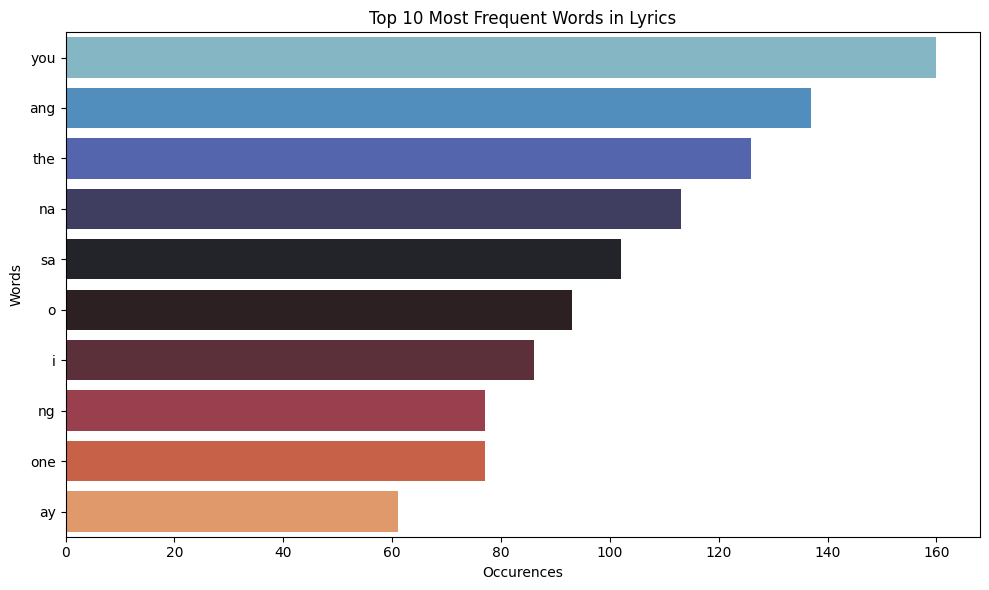

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occurences', y='Word', data=word_frequency_df.head(10), palette='icefire')
plt.xlabel('Occurences')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words in Lyrics')
plt.tight_layout()

plt.show()